# Dummynet playground

Let's see how good the fully-connected dummynet is for a simple 2D classification problem. First, let's create some test data to play with:

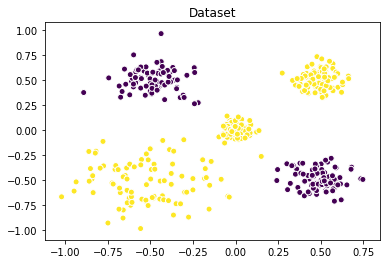

In [1]:
import random
import numpy as np

np.random.seed(42)

# define population parameters for the two classes of objects we'll play with
unit_m = np.identity(2)
populations = [
    {'class': 1, 'mean': (0.5, 0.5), 'cov': unit_m*np.random.random()/50., 'size': np.random.randint(80, 100)},
    {'class': 0, 'mean': (-0.5, 0.5), 'cov': unit_m*np.random.random()/50., 'size': np.random.randint(80, 100)},
    {'class': 1, 'mean': (-0.5, -0.5), 'cov': unit_m*np.random.random()/10., 'size': np.random.randint(80, 100)},
    {'class': 0, 'mean': (0.5, -0.5), 'cov': unit_m*np.random.random()/50., 'size': np.random.randint(80, 100)},
    {'class': 1, 'mean': (0, 0), 'cov': unit_m*np.random.random()/50., 'size': np.random.randint(80, 100)}
]

# construct inputs and labels from 2D gaussian 
inputs, labels = [], []
for pp in populations:
    lbl = pp.pop('class')
    inputs += np.random.multivariate_normal(**pp).tolist()
    labels += [lbl]*pp['size']

# shuffle the lists
c = list(zip(inputs, labels))
random.shuffle(c)
inputs, labels = zip(*c)

import matplotlib.pyplot as plt
x, y = zip(*inputs)
plt.scatter(x, y, c=labels, edgecolor='w')
plt.title("Dataset")
plt.show()

Now, we initialize the network using two hidden layers:

In [2]:
from dummynet import dummynet
net = dummynet([2, 20, 30, 1], activation='sigmoid')

Initializing dummynet.


Finally, let's train it and see how it performs..

  1%|          | 10/1000 [00:00<00:10, 94.24it/s]

training dummynet using SGD with 1000 batches of 100 elements each.


100%|██████████| 1000/1000 [00:07<00:00, 125.46it/s]


dummynet has been trained! took 7.99e+00 sec


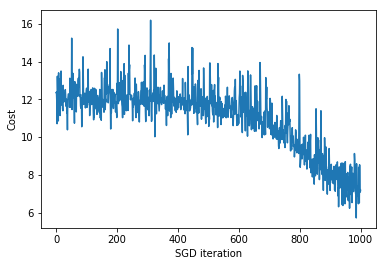

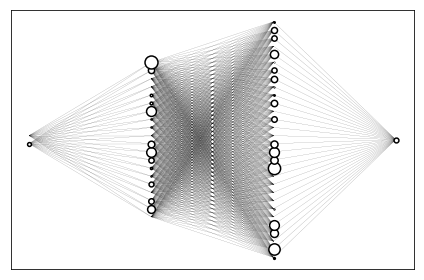

In [3]:
# use SGD to train
cost_trend = net.train(inputs, labels, learning_rate=2, n_batches=1000, batch_size=100)

# plot the cost as a function of iteration
plt.plot(cost_trend)
plt.xlabel("SGD iteration")
plt.ylabel("Cost")
plt.show()

# look at the trained model. The size of the nodes is proportional to the corresponding weight
net.visualize()

finally, let's evaluate the network on a grid of points to see the decision boundaries it has learned..

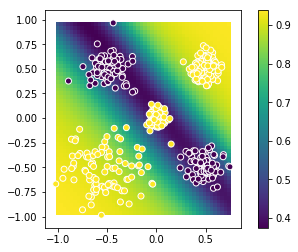

In [4]:
# evaluate the net over a grid
x, y = zip(*inputs)
xx = np.linspace(min(x), max(x), 50)
yy = np.linspace(min(y), max(y), 50)
res = [net((x,y)) for x in xx for y in yy]

# plot everything
res = np.array(res).reshape(len(xx), len(yy))
im = plt.imshow(res, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower')
plt.colorbar()
plt.scatter(x, y, c=labels, edgecolor='w')
plt.show()